<a href="https://colab.research.google.com/github/Baobui19112001/BaicuoikiAI/blob/main/Nhandang10loaidongvatbangamthanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Any results you write to the current directory are saved as output.
import os
sounds = os.listdir("/content/drive/MyDrive/cuoikiAI/chomeo/AI/train/")
print(os.listdir("/content/drive/MyDrive/cuoikiAI/chomeo/AI/train/"))
import warnings
warnings.filterwarnings("ignore")

['Bird', 'Cat', 'Chicken', 'Cow', 'Dog', 'Frog', 'Horse', 'Lion', 'Pig', 'Sheep']


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import glob
import ntpath
# List the wav files
ROOT_DIR_TEST = glob.glob('/content/drive/MyDrive/cuoikiAI/chomeo/AI/test')[0]
ROOT_DIR_TRAIN = glob.glob('/content/drive/MyDrive/cuoikiAI/chomeo/AI/train')[0]
X_path = glob.glob(ROOT_DIR_TEST + "/Dog/*") 
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Cat/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Bird/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Chicken/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Cow/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Frog/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Horse/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Lion/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Pig/*")
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/Sheep/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Dog/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Cat/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Bird/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Chicken/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Cow/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Frog/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Lion/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Horse/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Pig/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/Sheep/*")
print (len(X_path))

590


In [40]:
y = np.empty((0, 1, ))
for f in X_path:
    if 'cat' in ntpath.basename(f):
        resp = np.array([0])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
    if 'dog' in ntpath.basename(f):
        resp = np.array([1])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
    if 'bird' in ntpath.basename(f):
        resp = np.array([2])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp)) 
    if 'chicken' in ntpath.basename(f):
        resp = np.array([3])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
    if 'frog' in ntpath.basename(f):
        resp = np.array([4])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
    if 'cow' in ntpath.basename(f):
        resp = np.array([5])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))     
    if 'lion' in ntpath.basename(f):
        resp = np.array([6])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp)) 
    if 'horse' in ntpath.basename(f):
        resp = np.array([7])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp)) 
    if 'pig' in ntpath.basename(f):
        resp = np.array([8])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
    if 'sheep' in ntpath.basename(f):
        resp = np.array([9])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp)) 
print (y.shape)

(590, 1)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_path, y, test_size=0.33)
print("len(y_train)",len(y_train))
print("len(y_test)",len(y_test))
print(y_test.shape)
print(y_train.shape)

len(y_train) 395
len(y_test) 195
(195, 1)
(395, 1)


In [42]:
def read_wav_files(wav_files):
    '''Returns a list of audio waves
    Params:
        wav_files: List of .wav paths
    
    Returns:
        List of audio signals
    '''
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [sci_wav.read(f)[1] for f in wav_files]

In [43]:
def librosa_read_wav_files(wav_files):
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [librosa.load(f)[0] for f in wav_files]

In [44]:
import librosa
wav_rate = librosa.load(X_train[0])[1]
X_train = librosa_read_wav_files(X_train)
X_test  = librosa_read_wav_files(X_test)

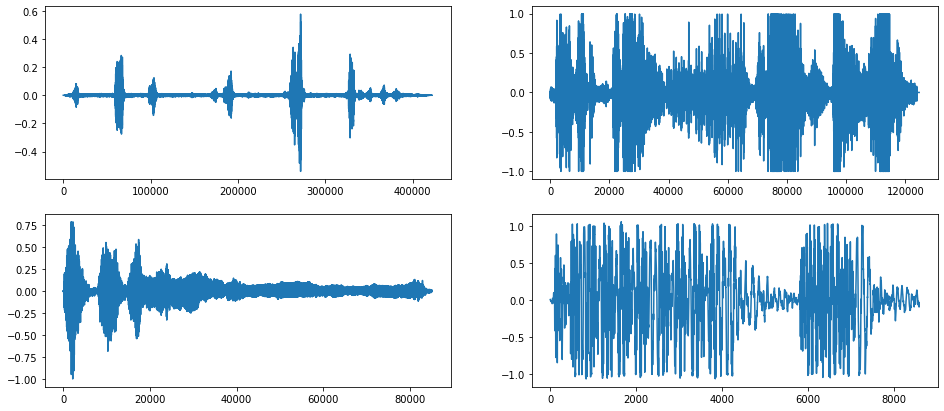

In [45]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16,7))
axs[0][0].plot(X_train[0])
axs[0][1].plot(X_train[1])
axs[1][0].plot(X_train[2])
axs[1][1].plot(X_train[3])
plt.show()

In [46]:
def extract_features(audio_samples, sample_rate):
    extracted_features = np.empty((0, 41, ))
    if not isinstance(audio_samples, list):
        audio_samples = [audio_samples]
        
    for sample in audio_samples:
        zero_cross_feat = librosa.feature.zero_crossing_rate(sample).mean()
        
        mfccs = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)

        mfccsscaled = np.append(mfccsscaled, zero_cross_feat)
        mfccsscaled = mfccsscaled.reshape(1, 41, )
        extracted_features = np.vstack((extracted_features, mfccsscaled))

    return extracted_features

1
(1, 41)


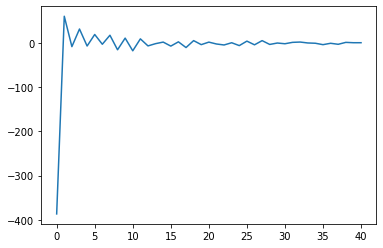

In [47]:
features = ((extract_features(X_train[0], wav_rate)))
print (len(features))
print (features.shape)
plt.plot(features[0])

In [48]:
X_train_features = extract_features(X_train, wav_rate)
X_test_features  = extract_features(X_test, wav_rate)
print("Image array shape: ", X_train_features.shape)
print("Image array shape: ", X_test_features.shape)
print("Label array shape: ", y_train.shape)
print("Label array shape: ", y_test.shape)

Image array shape:  (395, 41)
Image array shape:  (195, 41)
Label array shape:  (395, 1)
Label array shape:  (195, 1)


In [49]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [50]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [51]:
model = models.Sequential()

model.add(layers.Dense(100, activation = 'relu', input_shape = (41, )))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4200      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 9,760
Trainable params: 9,760
Non-trainable params: 0
_________________________________________________________________


In [52]:
# #Choose the parameters to train the neural network
best_model_weights = './base.model'
checkpoint = ModelCheckpoint(
                              best_model_weights,
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              mode='min',
                              save_weights_only=False,
                              period=1
                            )

callbacks = [checkpoint]

model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [53]:
history = model.fit(
                        X_train_features,
                        train_labels,
                        validation_data=(X_test_features,test_labels),
                        epochs = 200, 
                        verbose = 1,
                        callbacks=callbacks,
                    )

Epoch 1/200
13/13 [==============================] - 1s 20ms/step - loss: 10.4957 - accuracy: 0.3089 - val_loss: 4.6805 - val_accuracy: 0.4205
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 3.7694 - accuracy: 0.4354 - val_loss: 3.1949 - val_accuracy: 0.5231
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 2.3760 - accuracy: 0.5139 - val_loss: 2.3278 - val_accuracy: 0.5231
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 1.7709 - accuracy: 0.6101 - val_loss: 1.8625 - val_accuracy: 0.5949
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 1.3034 - accuracy: 0.6481 - val_loss: 1.6305 - val_accuracy: 0.6000
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 1.0747 - accuracy: 0.6987 - val_loss: 1.5308 - val_accuracy: 0.6308
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.9723 - accuracy: 0.7392 - val_loss: 1.6508 - val_accuracy: 0.6256
Epoch 8/200

In [54]:
from keras.models import load_model
model.save('Nhandiendongvatbangamthanh.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


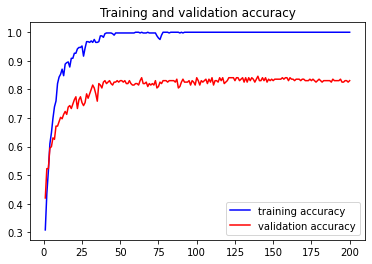

In [55]:

print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "training accuracy")
plt.plot(epochs, val_acc, 'r', label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [56]:
import IPython.display as ipd

Day la con bo


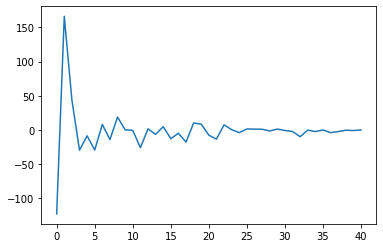

In [57]:
nr_to_predict = 41
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))
if (y_test[nr_to_predict] == 0):
    print ("Day la con meo")
if (y_test[nr_to_predict] == 1):
    print ("Day la con cho")
if (y_test[nr_to_predict] == 2):
  print ("Day la con chim")
if (y_test[nr_to_predict] == 3):
  print ("Day la con ga")
if (y_test[nr_to_predict] == 4):
    print ("Day la con ech")
if (y_test[nr_to_predict] == 5):
    print ("Day la con bo")
if (y_test[nr_to_predict] == 6):
    print ("Day la con su tu")
if (y_test[nr_to_predict] == 7):
    print ("Day la con ngua")
if (y_test[nr_to_predict] == 8):
    print ("Day la con heo")
if (y_test[nr_to_predict] == 9):
    print ("Day la con cuu")
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

Day la con cho


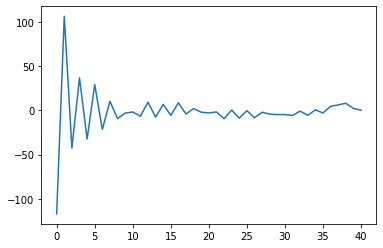

In [58]:
nr_to_predict = 103
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))
if (y_test[nr_to_predict] == 0):
    print ("Day la con meo")
if (y_test[nr_to_predict] == 1):
    print ("Day la con cho")
if (y_test[nr_to_predict] == 2):
  print ("Day la con chim")
if (y_test[nr_to_predict] == 3):
  print ("Day la con ga")
if (y_test[nr_to_predict] == 4):
    print ("Day la con ech")
if (y_test[nr_to_predict] == 5):
    print ("Day la con bo")
if (y_test[nr_to_predict] == 6):
    print ("Day la con su tu")
if (y_test[nr_to_predict] == 7):
    print ("Day la con ngua")
if (y_test[nr_to_predict] == 8):
    print ("Day la con heo")
if (y_test[nr_to_predict] == 9):
    print ("Day la con cuu")
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

Day la con cho


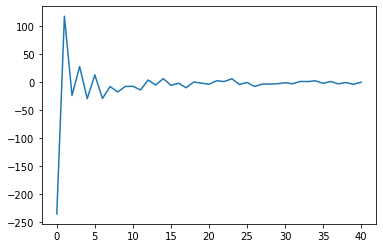

In [59]:
nr_to_predict = 60
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))
if (y_test[nr_to_predict] == 0):
    print ("Day la con meo")
if (y_test[nr_to_predict] == 1):
    print ("Day la con cho")
if (y_test[nr_to_predict] == 2):
  print ("Day la con chim")
if (y_test[nr_to_predict] == 3):
  print ("Day la con ga")
if (y_test[nr_to_predict] == 4):
    print ("Day la con ech")
if (y_test[nr_to_predict] == 5):
    print ("Day la con bo")
if (y_test[nr_to_predict] == 6):
    print ("Day la con su tu")
if (y_test[nr_to_predict] == 7):
    print ("Day la con ngua")
if (y_test[nr_to_predict] == 8):
    print ("Day la con heo")
if (y_test[nr_to_predict] == 9):
    print ("Day la con cuu")
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

Day la con su tu


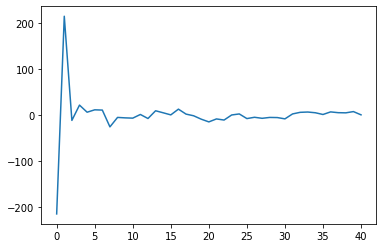

In [60]:
nr_to_predict = 2
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))
if (y_test[nr_to_predict] == 0):
    print ("Day la con meo")
if (y_test[nr_to_predict] == 1):
    print ("Day la con cho")
if (y_test[nr_to_predict] == 2):
  print ("Day la con chim")
if (y_test[nr_to_predict] == 3):
  print ("Day la con ga")
if (y_test[nr_to_predict] == 4):
    print ("Day la con ech")
if (y_test[nr_to_predict] == 5):
    print ("Day la con bo")
if (y_test[nr_to_predict] == 6):
    print ("Day la con su tu")
if (y_test[nr_to_predict] == 7):
    print ("Day la con ngua")
if (y_test[nr_to_predict] == 8):
    print ("Day la con heo")
if (y_test[nr_to_predict] == 9):
    print ("Day la con cuu")
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

Day la con heo


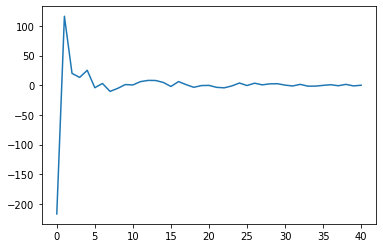

In [61]:
nr_to_predict = 17
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))
if (y_test[nr_to_predict] == 0):
    print ("Day la con meo")
if (y_test[nr_to_predict] == 1):
    print ("Day la con cho")
if (y_test[nr_to_predict] == 2):
  print ("Day la con chim")
if (y_test[nr_to_predict] == 3):
  print ("Day la con ga")
if (y_test[nr_to_predict] == 4):
    print ("Day la con ech")
if (y_test[nr_to_predict] == 5):
    print ("Day la con bo")
if (y_test[nr_to_predict] == 6):
    print ("Day la con su tu")
if (y_test[nr_to_predict] == 7):
    print ("Day la con ngua")
if (y_test[nr_to_predict] == 8):
    print ("Day la con heo")
if (y_test[nr_to_predict] == 9):
    print ("Day la con cuu")
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

Day la con ech


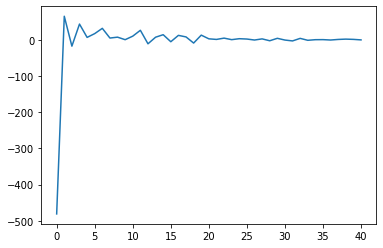

In [70]:
nr_to_predict = 102
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))
if (y_test[nr_to_predict] == 0):
    print ("Day la con meo")
if (y_test[nr_to_predict] == 1):
    print ("Day la con cho")
if (y_test[nr_to_predict] == 2):
  print ("Day la con chim")
if (y_test[nr_to_predict] == 3):
  print ("Day la con ga")
if (y_test[nr_to_predict] == 4):
    print ("Day la con ech")
if (y_test[nr_to_predict] == 5):
    print ("Day la con bo")
if (y_test[nr_to_predict] == 6):
    print ("Day la con su tu")
if (y_test[nr_to_predict] == 7):
    print ("Day la con ngua")
if (y_test[nr_to_predict] == 8):
    print ("Day la con heo")
if (y_test[nr_to_predict] == 9):
    print ("Day la con cuu")
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)